# <center>实验4 主成分分析与决策树分类器</center>

基于鸢（yuan1）尾花数据集进行主成分分析，选择合适的主成分个数，展示降维后的结果。基于降维后的数据，使用决策树分类器实现样本分类。<br>

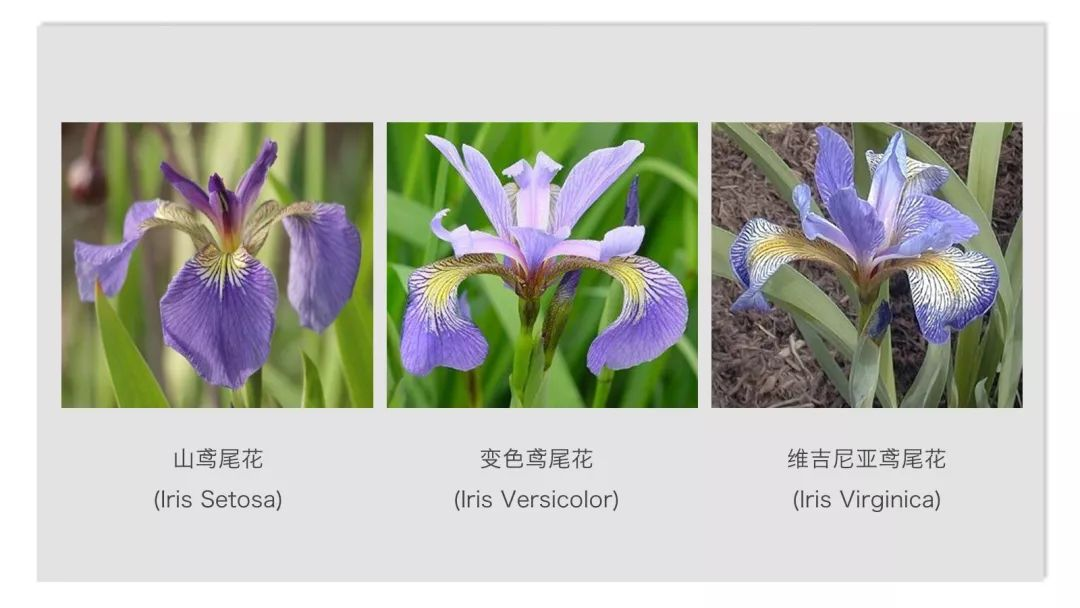
鸢尾花数据集包含了150条鸢尾花的数据，分为3类，每类50条数据，每条数据包含“花萼长度”、“花萼宽度”、“花瓣长度”、“花瓣宽度”四种属性。<br>
选取每个种类中各三条数据作为示例，如表1所示：
<center>表1 鸢尾花数据集部分示例</center>
<center>
<table>
  <tr>
    <td>
      <p>&nbsp;</p>
    </td>
    <td>
      <p>Sepal.Length</p>
    </td>
    <td>
      <p>Sepal.Width</p>
    </td>
    <td>
      <p>Petal.Length</p>
    </td>
    <td>
      <p>Petal.Width</p>
    </td>
    <td>
      <p>Species</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>1</p>
    </td>
    <td>
      <p>5.1</p>
    </td>
    <td>
      <p>3.5</p>
    </td>
    <td>
      <p>1.4</p>
    </td>
    <td>
      <p>0.2</p>
    </td>
    <td>
      <p>setosa</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>2</p>
    </td>
    <td>
      <p>4.9</p>
    </td>
    <td>
      <p>3</p>
    </td>
    <td>
      <p>1.4</p>
    </td>
    <td>
      <p>0.2</p>
    </td>
    <td>
      <p>setosa</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>3</p>
    </td>
    <td>
      <p>4.7</p>
    </td>
    <td>
      <p>3.2</p>
    </td>
    <td>
      <p>1.3</p>
    </td>
    <td>
      <p>0.2</p>
    </td>
    <td>
      <p>setosa</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>4</p>
    </td>
    <td>
      <p>7</p>
    </td>
    <td>
      <p>3.2</p>
    </td>
    <td>
      <p>4.7</p>
    </td>
    <td>
      <p>1.4</p>
    </td>
    <td>
      <p>versicolor</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>5</p>
    </td>
    <td>
      <p>6.4</p>
    </td>
    <td>
      <p>3.2</p>
    </td>
    <td>
      <p>4.5</p>
    </td>
    <td>
      <p>1.5</p>
    </td>
    <td>
      <p>versicolor</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>6</p>
    </td>
    <td>
      <p>6.9</p>
    </td>
    <td>
      <p>3.1</p>
    </td>
    <td>
      <p>4.9</p>
    </td>
    <td>
      <p>1.5</p>
    </td>
    <td>
      <p>versicolor</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>7</p>
    </td>
    <td>
      <p>6.3</p>
    </td>
    <td>
      <p>3.3</p>
    </td>
    <td>
      <p>6</p>
    </td>
    <td>
      <p>2.5</p>
    </td>
    <td>
      <p>virginica</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>8</p>
    </td>
    <td>
      <p>5.8</p>
    </td>
    <td>
      <p>2.7</p>
    </td>
    <td>
      <p>5.1</p>
    </td>
    <td>
      <p>1.9</p>
    </td>
    <td>
      <p>virginica</p>
    </td>
  </tr>
  <tr>
    <td>
      <p>9</p>
    </td>
    <td>
      <p>7.1</p>
    </td>
    <td>
      <p>3</p>
    </td>
    <td>
      <p>5.9</p>
    </td>
    <td>
      <p>2.1</p>
    </td>
    <td>
      <p>virginica</p>
    </td>
  </tr>
</table>
</center>



 

In [21]:
import pandas as pd
import numpy as np

iris = pd.read_csv('data\iris.csv')  #读取数据文件

data = iris.iloc[:, :4]  #获得样本数据

target = iris.iloc[:,-1].values   #获得样本的类标签

<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_12476\2241799646.py:4: SyntaxWarning: invalid escape sequence '\i'
  iris = pd.read_csv('data\iris.csv')  #读取数据文件


In [22]:
#标准化处理数据

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)



In [23]:
#计算数据集的协方差矩阵
# 计算各列的均值
mean_vec = np.mean(data_scaled, axis=0)  # 对各列求均值，返回 1*n 矩阵

# 计算协方差矩阵
cov_mat = (data_scaled - mean_vec).T.dot((data_scaled - mean_vec)) / (data_scaled.shape[0] - 1)

# 打印协方差矩阵
print('协方差矩阵：\n%s' % cov_mat)

协方差矩阵：
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


回答问题

问题：协方差矩阵说明了什么？
答：第一列和其他列的关系：

第一列和第三列的协方差为 0.87760447，表示它们之间有较强的正相关关系。
第一列和第四列的协方差为 0.82343066，表示它们之间也有较强的正相关关系。
第一列和第二列的协方差为 -0.11835884，表示它们之间有弱的负相关关系。
第二列和其他列的关系：

第二列和第三列的协方差为 -0.43131554，表示它们之间有中等强度的负相关关系。
第二列和第四列的协方差为 -0.36858315，表示它们之间也有中等强度的负相关关系。
第三列和其他列的关系：

第三列和第四列的协方差为 0.96932762，表示它们之间有很强的正相关关系。



In [24]:
#求解协方差矩阵的特征值及相应的正交化单位特征向量
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('特征值：\n%s' % eig_vals)
print('特征向量：\n%s' % eig_vecs)




特征值：
[2.93808505 0.9201649  0.14774182 0.02085386]
特征向量：
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [25]:
#将特征值和特征向量对应起来，按照特征值大小排序
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('特征值和特征向量对：\n%s' % eig_pairs)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('特征值由大到小排序结果：' )
for i in eig_pairs:
    print(i[0]) 



特征值和特征向量对：
[(2.938085050199995, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624864, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])), (0.1477418210449483, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])), (0.020853862176462824, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
特征值由大到小排序结果：
2.938085050199995
0.9201649041624864
0.1477418210449483
0.020853862176462824


In [26]:
#确定主成分的贡献率
total = sum(eig_vals)
var_exp = [(i / total) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('\n%s' % var_exp)
print('\n%s' % cum_var_exp)




[72.96244541329987, 22.85076178670175, 3.6689218892828825, 0.5178709107154935]

[ 72.96244541  95.8132072   99.48212909 100.        ]


In [27]:
#组合第一和第二特征向量实现降维
#保存在data_pca中
matrix_w = np.hstack((eig_pairs[0][1].reshape(4, 1), eig_pairs[1][1].reshape(4, 1)))
data_pca = data_scaled.dot(matrix_w)
print('PCA降维:\n', data_pca)




PCA降维:
 [[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]
 [-2.07563095 -1.48917752]
 [-2.44402884 -0.0476442 ]
 [-2.23284716 -0.22314807]
 [-2.33464048  1.11532768]
 [-2.18432817  0.46901356]
 [-2.1663101  -1.04369065]
 [-2.32613087 -0.13307834]
 [-2.2184509   0.72867617]
 [-2.6331007   0.96150673]
 [-2.1987406  -1.86005711]
 [-2.26221453 -2.68628449]
 [-2.2075877  -1.48360936]
 [-2.19034951 -0.48883832]
 [-1.898572   -1.40501879]
 [-2.34336905 -1.12784938]
 [-1.914323   -0.40885571]
 [-2.20701284 -0.92412143]
 [-2.7743447  -0.45834367]
 [-1.81866953 -0.08555853]
 [-2.22716331 -0.13725446]
 [-1.95184633  0.62561859]
 [-2.05115137 -0.24216355]
 [-2.16857717 -0.52714953]
 [-2.13956345 -0.31321781]
 [-2.26526149  0.3377319 ]
 [-2.14012214  0.50454069]
 [-1.83159477 -0.42369507]
 [-2.61494794 -1.79357586]
 [-2.44617739 -2.15072788]
 [-2.10997488  0.46020184]
 [-2.2078089   0.2061074 ]
 [-2.04514621 -0.661

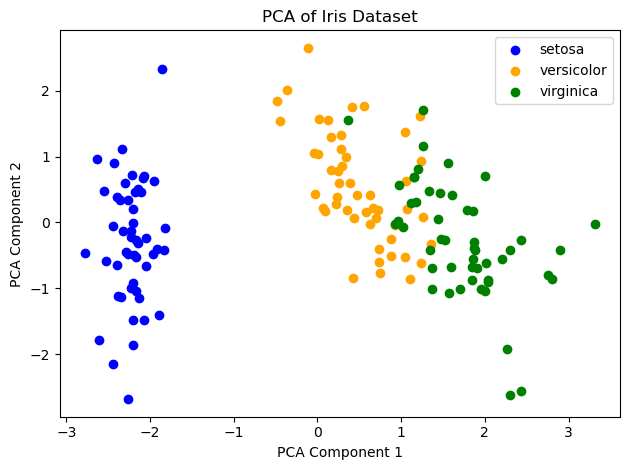

In [28]:
#可视化降维后的数据分布
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(data_pca[target=='setosa', 0], data_pca[target=='setosa', 1], c='blue', label='setosa')
plt.scatter(data_pca[target=='versicolor', 0], data_pca[target=='versicolor', 1], c='orange', label='versicolor')
plt.scatter(data_pca[target=='virginica', 0], data_pca[target=='virginica', 1], c='green', label='virginica')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='best')
plt.title('PCA of Iris Dataset') 
plt.tight_layout()
plt.show()




In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class DecisionTree:
    def __init__(self):
        pass
    
    def gini(self, y):  # 计算基尼指数
        classes = np.unique(y)
        gini = 1
        for cls in classes:
            p_cls = np.mean(y == cls)
            gini -= p_cls ** 2
        return gini
    
    def information_gain(self, X, y, feature_idx, threshold):  # 计算信息增益
        parent_gini = self.gini(y)
        left_idxs = X[:, feature_idx] < threshold
        right_idxs = ~left_idxs
        if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
            return 0
        left_gini = self.gini(y[left_idxs])
        right_gini = self.gini(y[right_idxs])
        child_gini = np.mean(left_idxs) * left_gini + np.mean(right_idxs) * right_gini
        return parent_gini - child_gini
    
    def find_best_split(self, X, y):  # 找出最优划分
        best_gain = 0
        best_feature_idx = None
        best_threshold = None
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain = self.information_gain(X, y, feature_idx, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature_idx = feature_idx
                    best_threshold = threshold
        return best_feature_idx, best_threshold
    
    def fit(self, X, y):  # 拟合数据
        if len(np.unique(y)) == 1:
            return {'class': y[0]}
        else:
            best_feature_idx, best_threshold = self.find_best_split(X, y)
            left_idxs = X[:, best_feature_idx] < best_threshold
            right_idxs = ~left_idxs
            tree = {
                'feature_idx': best_feature_idx,
                'threshold': best_threshold,
                'left': self.fit(X[left_idxs], y[left_idxs]),
                'right': self.fit(X[right_idxs], y[right_idxs])
            }
            return tree
    
    def predict_sample(self, sample, tree):
        if 'class' in tree:
            return tree['class']
        else:
            if sample[tree['feature_idx']] < tree['threshold']:
                return self.predict_sample(sample, tree['left'])
            else:
                return self.predict_sample(sample, tree['right'])
    
    def predict(self, X, tree):
        return [self.predict_sample(sample, tree) for sample in X]


In [30]:
from sklearn.model_selection import train_test_split


# 将PCA处理过的数据分成训练数据和测试数据,80%用于训练，20%用于测试
X_train, X_test, y_train, y_test = train_test_split(data_pca, target, test_size=0.2, random_state=42)

dt = DecisionTree()
tree = dt.fit(X_train, y_train)   #后续用graphviz对其可视化

#输出训练好的树
print(tree)

# 预测
y_pred = dt.predict(X_test,tree)



{'feature_idx': 0, 'threshold': -0.48732274212564053, 'left': {'class': 'setosa'}, 'right': {'feature_idx': 0, 'threshold': 1.114147740686474, 'left': {'feature_idx': 0, 'threshold': 0.9248249165424187, 'left': {'feature_idx': 1, 'threshold': 1.5615028914765066, 'left': {'class': 'versicolor'}, 'right': {'feature_idx': 1, 'threshold': 1.5622718342099677, 'left': {'class': 'virginica'}, 'right': {'class': 'versicolor'}}}, 'right': {'feature_idx': 0, 'threshold': 1.044531384396278, 'left': {'feature_idx': 1, 'threshold': -0.01722310045228294, 'left': {'class': 'versicolor'}, 'right': {'class': 'virginica'}}, 'right': {'class': 'versicolor'}}}, 'right': {'feature_idx': 0, 'threshold': 1.3727877895140725, 'left': {'feature_idx': 1, 'threshold': 0.2929226233357325, 'left': {'feature_idx': 0, 'threshold': 1.3462921036270614, 'left': {'class': 'versicolor'}, 'right': {'feature_idx': 0, 'threshold': 1.3584051214406314, 'left': {'class': 'virginica'}, 'right': {'class': 'versicolor'}}}, 'right'

In [31]:
from sklearn.metrics import accuracy_score, classification_report

# 评估分类器的性能
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=np.unique(target)))

Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



实验要求：将上述决策树的算法中不纯性度量改为基尼指数，重构算法，完成数据的训练和测试。

In [32]:
import os
from graphviz import Digraph

# 设置Graphviz的安装路径
# 请将路径替换为你的Graphviz安装路径
# 例如：graphviz_path = r'C:\Program Files\Graphviz\bin'
graphviz_path = r'C:\Program Files\Graphviz\bin'

# 将Graphviz的安装路径添加到系统的PATH环境变量中
os.environ["PATH"] += os.pathsep + graphviz_path





(process:1740): Pango-CRITICAL **: 19:38:46.026: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:1740): Pango-CRITICAL **: 19:38:46.026: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:1740): Pango-CRITICAL **: 19:38:46.026: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:1740): Pango-CRITICAL **: 19:38:46.027: pango_font_description_get_family: assertion 'desc != NULL' failed


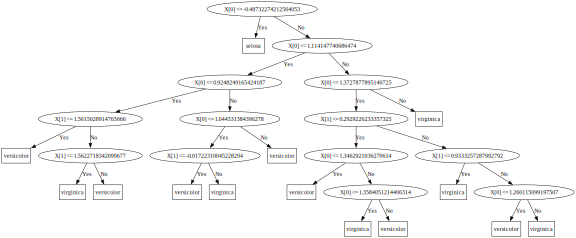

In [33]:
#将决策树可视化
import graphviz

def visualize_tree(tree_data, parent=None, node_name=None):
    if node_name is None:
        node_name = str(tree_data['feature_idx']) + ' <= ' + str(tree_data['threshold'])
    if 'class' in tree_data:
        class_label = tree_data['class']
        dot.node(node_name, class_label, shape='box')
    else:
        feature_idx = tree_data['feature_idx']
        threshold = tree_data['threshold']
        dot.node(node_name, f"X[{feature_idx}] <= {threshold}")
        left_child_name = f"{node_name}_left"
        right_child_name = f"{node_name}_right"
        dot.edge(node_name, left_child_name, label="Yes")
        dot.edge(node_name, right_child_name, label="No")
        visualize_tree(tree_data['left'], node_name, left_child_name)
        visualize_tree(tree_data['right'], node_name, right_child_name)

dot = graphviz.Digraph(graph_attr={'size': '8,8'})  # 设置图形大小
visualize_tree(tree)
display(dot)
